Document classification using SVM

The dataset used here is the <b>20 Newsgroups dataset</b>. This dataset contains around 18000 newsgroup posts on 20 topics.

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import nltk
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
ng_data = fetch_20newsgroups(subset = "all", random_state=42)

In [3]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hrishikesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/hrishikesh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
print(ng_data["data"][1])

From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

  My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

-- 
    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   
  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- 
    |   of heaven, because everything he does is right and all his ways  |   
    |   are just." - Nebuchadnezzar, king of Babylon, 562 B.C.           |   



Following are the genres of text available in the dataset

In [6]:
for target in ng_data["target_names"]:
    print(target)

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


Preprocessing

In [7]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    text = nltk.word_tokenize(text)
    text = ' '.join([word for word in text if word not in stop_words])
    return text
    

The above function is applied for preprocessing the text. The function:
1. Converts all text into lower case.
2. Removes all punctuations and numbers.
3. Tokenizes the text.
4. Removes the stopwords from the text 

In [8]:
ng_data_df = pd.DataFrame({'text' : ng_data.data,'target': ng_data.target})

Each category has the following number of documents:


<Axes: xlabel='target', ylabel='count'>

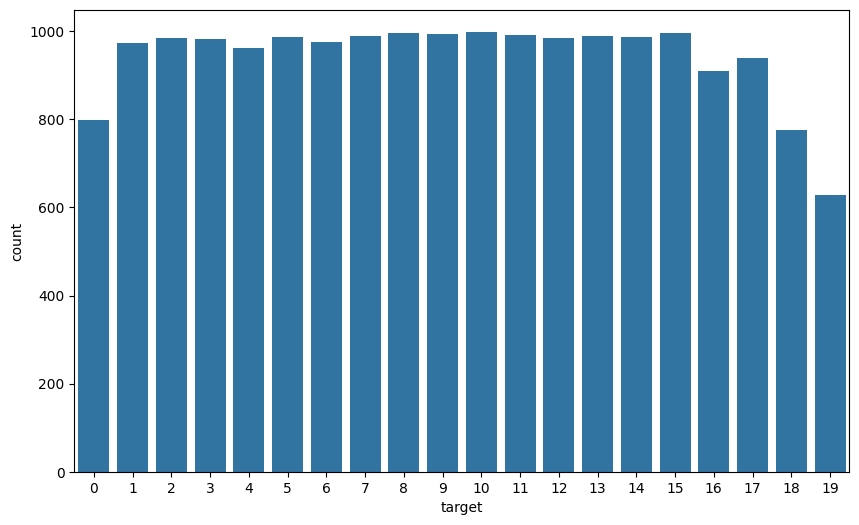

In [9]:
print("Each category has the following number of documents:")
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=ng_data_df)

In [10]:
ng_data_df

,text,target
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4
...,...,...
18841,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13
18842,From: rdell@cbnewsf.cb.att.com (richard.b.dell...,12
18843,From: westes@netcom.com (Will Estes)\nSubject:...,3
18844,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1


In [11]:
ng_data_df["text"] = ng_data_df["text"].apply(preprocess_text)

In [12]:
ng_data_df

,text,target
0,mamatha devineni ratnam mrandrewcmuedu subject...,10
1,mblawsonmidwayecnuoknoredu matthew b lawson su...,3
2,hilmierdsvsuse hilmi eren subject armenia says...,17
3,guydaustinibmcom guy dawson subject ide vs scs...,3
4,alexander samuel mcdiarmid amoandrewcmuedu sub...,4
...,...,...
18841,jimzisfeinfactorycom jim zisfein subject migra...,13
18842,rdellcbnewsfcbattcom richardbdell subject ques...,12
18843,westesnetcomcom estes subject mounting cpu coo...,3
18844,stevehcrlgw steven collins subject sphere poin...,1


In [13]:
ng_data_df_labels = ng_data_df['target']
ng_data_df_text = ng_data_df['text']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(ng_data_df["text"], ng_data_df["target"], test_size=0.2, random_state=42)

In [15]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [16]:
first_sentence = X_train_vec[0]
print("First sentence vectorized:", first_sentence)

First sentence vectorized: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 48 stored elements and shape (1, 136908)>
  Coords	Values
  (0, 64837)	0.34317997306922177
  (0, 91842)	0.23608521565038057
  (0, 64834)	0.32163317934907026
  (0, 116782)	0.014060110220066016
  (0, 85439)	0.06754216166754277
  (0, 26541)	0.06258597882526941
  (0, 89678)	0.014609730083704097
  (0, 53258)	0.052081610192043604
  (0, 62296)	0.014100267315509214
  (0, 86199)	0.026083685726732624
  (0, 34637)	0.09085703119459652
  (0, 134229)	0.09000464232980762
  (0, 104978)	0.1267025112978251
  (0, 54476)	0.04303582112822667
  (0, 43930)	0.07421757732394232
  (0, 95720)	0.07087976938744545
  (0, 44824)	0.09973704718728821
  (0, 60586)	0.044566106371724354
  (0, 23029)	0.05850441709935795
  (0, 26292)	0.05591896981200225
  (0, 101684)	0.060949559687081906
  (0, 1137)	0.07330595465344263
  (0, 37856)	0.08486623763347509
  (0, 62470)	0.1103406921385077
  (0, 84654)	0.06453928627720062
  (0, 26612)	0.06116

Training a SVM model on the vectorized data. The model will be using a linear kernel for classification.

In [17]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_vec, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Testing the SVM model

In [18]:
y_pred = svm_model.predict(X_test_vec)


Classification report of the SVM

In [19]:
print(classification_report(y_test, y_pred, target_names=ng_data.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.92      0.88      0.90       151
           comp.graphics       0.74      0.90      0.81       202
 comp.os.ms-windows.misc       0.89      0.87      0.88       195
comp.sys.ibm.pc.hardware       0.76      0.81      0.78       183
   comp.sys.mac.hardware       0.93      0.90      0.91       205
          comp.windows.x       0.91      0.85      0.88       215
            misc.forsale       0.88      0.84      0.86       193
               rec.autos       0.94      0.95      0.95       196
         rec.motorcycles       1.00      0.94      0.97       168
      rec.sport.baseball       0.98      0.98      0.98       211
        rec.sport.hockey       0.99      0.97      0.98       198
               sci.crypt       0.99      0.95      0.97       201
         sci.electronics       0.83      0.90      0.87       202
                 sci.med       0.92      0.95      0.94       194
         

Accuraccy of the model

In [20]:
print(accuracy_score(y_test, y_pred))

0.9143236074270557


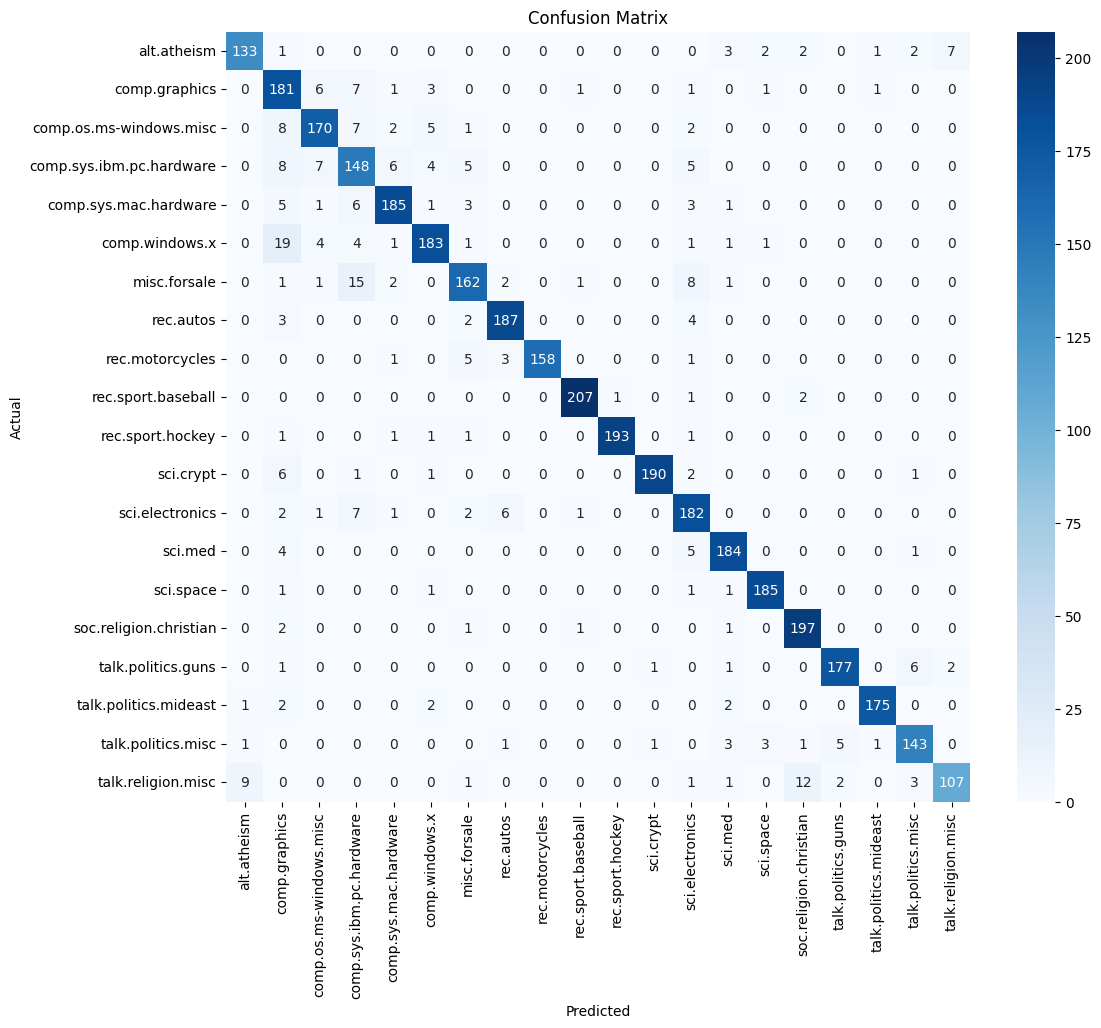

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=ng_data.target_names, yticklabels=ng_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()